<a href="https://colab.research.google.com/github/jelal1cam/CAMSIF/blob/main/01_Exercise_Notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1

We first load a dataset and examine its dimensions.

In [1]:
# If you are running this on Google Colab, uncomment and run the following lines; otherwise ignore this cell
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import math
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

xy_data = np.load('/content/drive/MyDrive/Data Science Coursework/Exercises/Ex1_polyreg_data.npy')

np.shape(xy_data)

(70, 2)

The matrix `xy_data` contains $70$ rows, each a data point of the form $(x_i,y_i)$ for $i=1, \ldots, 70$.

### 1a) Plot the data in a scatterplot.

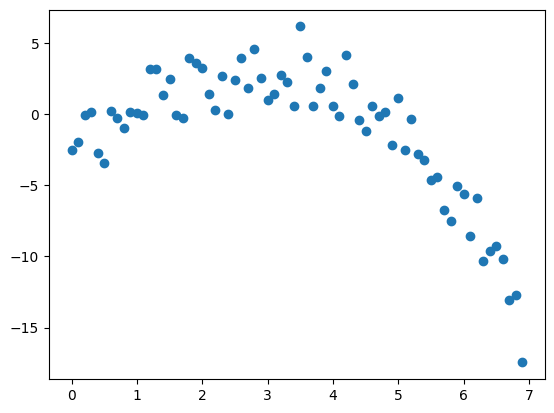

In [13]:
# Your code for scatterplot here
data_x, data_y = np.swapaxes(xy_data, 0, 1)
plt.scatter(data_x, data_y)

### 1b) Write a function `polyreg` to fit a polynomial of a given order to a dataset.
The inputs to the function are a data matrix of dimension $N \times 2$,  and $k \geq 0$, the order of the polynomial.   The function should compute the coefficients of the polynomial $\beta_0 + \beta_1 x +  \ldots  +\beta_k x^{k}$ via least squares regression, and should return the coefficient vector, the fit, and the vector of residuals.

If specified the degree $k$ is greater than or equal to $N$, then the function must fit an order $(N-1)$ polynomial and set the remaining coefficients to zero.

**NOTE**: You are *not* allowed to use the built-in function `np.polyfit`.

In [14]:
def polyreg(data_matrix, k):
    def residual(X, y, beta):
      return y - X @ beta

    def sse(X, y, beta):
      return np.sum(residual(X, y, beta)**2)

    k = min(len(data_matrix) - 1, k)

    data_x, data_y = np.swapaxes(data_matrix, 0, 1)

    X = np.vstack([data_x**i for i in range(k + 1)]).T

    beta = np.linalg.inv(X.T @ X) @ X.T @ data_y

    sse_0 = np.sum((data_y - np.mean(data_y))**2)

    return beta, 1 - sse(X, data_y, beta) / sse_0, residual(X, data_y, beta)

def predict(x, beta):
    X_new = np.vstack([x**i for i in range(len(beta))]).T
    return X_new @ beta

Use the tests below to check the outputs of the function you have written:

In [15]:
# Some tests to make sure your function is working correctly

xcol = np.arange(-1, 1.05, 0.1)
ycol = 2 - 7*xcol + 3*(xcol**2)  # We are generating data accoridng to y = 2 - 7x + 3x^2
test_matrix = np.transpose(np.vstack((xcol,ycol)))
test_matrix.shape

beta_test = polyreg(test_matrix, k=2)[0]
assert((np.round(beta_test[0], 3) == 2) and (np.round(beta_test[1], 3) == -7) and (np.round(beta_test[2], 3) == 3))
# We want to check that using the function with k=2 recovers the coefficients exactly

# Now check the zeroth order fit, i.e., the function gives the correct output with k=0
beta_test = polyreg(test_matrix, k=0)[0]
res_test = polyreg(test_matrix, k=0)[2] #the last output of the function gives the vector of residuals

assert(np.round(beta_test, 3) == 3.1)
assert(np.round(np.linalg.norm(res_test), 3) == 19.937)

### 1c) Use `polyreg` to fit polynomial models for the data in `xy_data` for $k=2,3,4$:

- Plot the fits for the three cases on the same plot together with the scatterplot of the data. The plots should be labelled and a legend included.
- Compute and print the SSE and $R^2$ coefficient for each of the three cases.
- Which of the three models you would choose? Briefly justify your choice.

k: 2 
 SSE: 172.181, R^2: 0.888
k: 3 
 SSE: 152.406, R^2: 0.901
k: 4 
 SSE: 151.228, R^2: 0.901


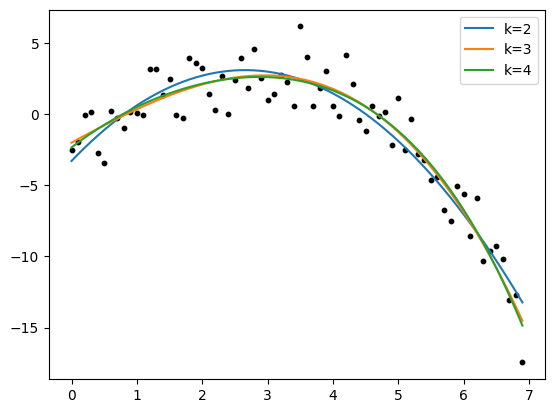

In [16]:
# Scatter plot of the original dataset
plt.scatter(data_x, data_y, s=10, color='black')

for k in [2, 3, 4]:
    coefficients, r_squared, residuals = polyreg(xy_data, k)

    print(f'k: {k} \n SSE: {np.sum(residuals**2):.3f}, R^2: {r_squared:.3f}')

    predicted_values = predict(data_x, coefficients)

    plt.plot(data_x, predicted_values, label=f'k={k}')

plt.legend(loc='best')

plt.show()

 #### State which model you choose and briefly justify your choice.

My preference is for k=4 since it demonstrates the lowest error and the highest R^2 score, suggesting superior performance. Based on these metrics, k=4 emerges as the optimal selection. However, k=4 could potentially be overfitting the data.

### 1d)  For the model you have chosen in the previous part (either $k=2/3/4)$:

- Plot the residuals in a scatter plot.
- Plot a histogram of the residuals along with a Gaussian pdf with zero mean and the same standard deviation as the residuals.

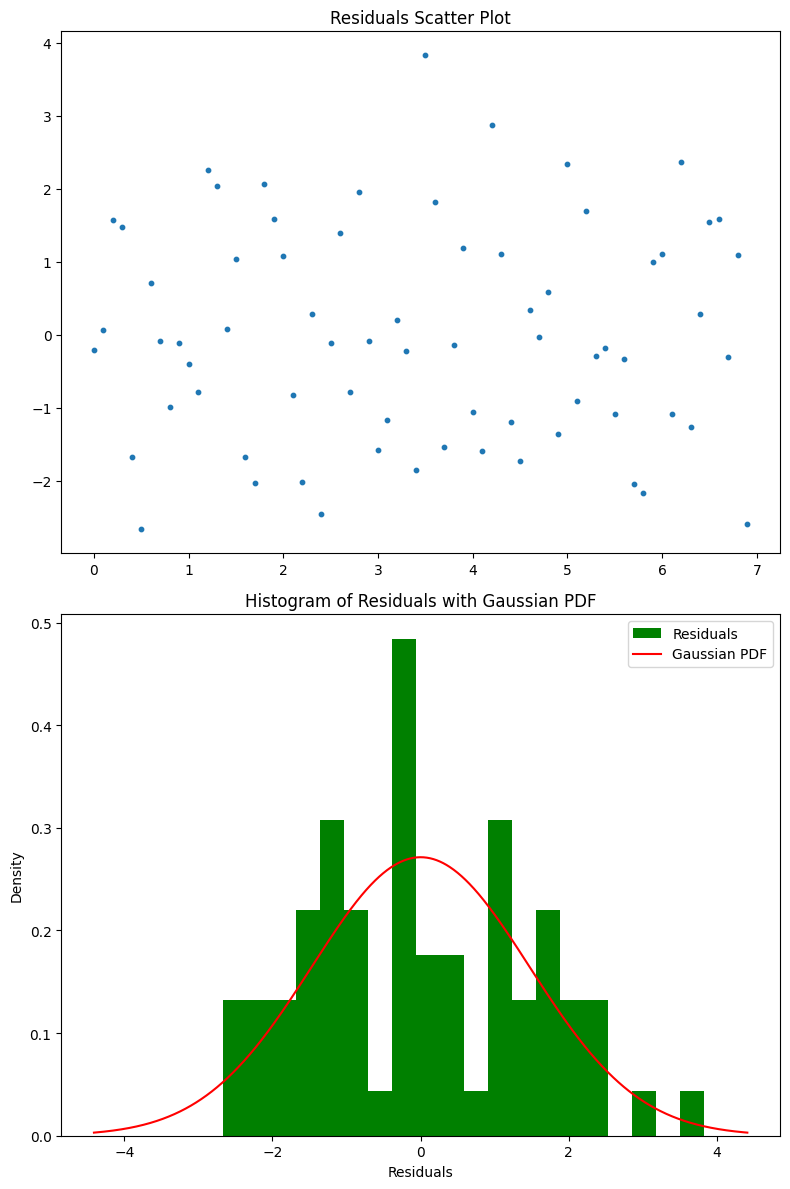

In [ ]:
#Your code here

coefficients, r_squared, residuals = polyreg(xy_data, 4)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 12))

ax1.scatter(data_x, residuals, s=10)
ax1.set_title('Residuals Scatter Plot')
ax2.hist(residuals, bins=20, density=True, color='green', label='Residuals')

residual_std_dev = np.std(residuals)
x_values = np.linspace(-3 * residual_std_dev, 3 * residual_std_dev, 1000)

ax2.plot(x_values, norm.pdf(x_values, loc=0, scale=residual_std_dev), color='red', label='Gaussian PDF')
ax2.set_title('Histogram of Residuals with Gaussian PDF')
ax2.set_xlabel('Residuals')
ax2.set_ylabel('Density')
ax2.legend()

plt.tight_layout()
plt.show()